In [126]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [127]:
# loading data
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [128]:
# dropping unneeded columns
# subsequent analysis dropped '+/-' and 'PTS' columns
teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE','+/-','PTS'])

In [129]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,MIN,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF
0,48,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19
1,48,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25
2,53,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16
3,48,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13
4,48,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17
5,48,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19
6,48,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21
7,48,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19
8,48,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15
9,48,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27


In [130]:
# defining target vector
#y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['W/L'].ravel()
y[:5]

array(['W', 'W', 'L', 'W', 'L'], dtype=object)

In [131]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

0    1
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64

In [132]:
# Splitting into Train and Test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [133]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [134]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [135]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [136]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)
#rf_model = rf_model.fit(X_train_scaled, y_train)

In [137]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)
#predictions = rf_model.predict(X_test_scaled)

In [138]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [139]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,173,36
Actual 1,39,177


Accuracy Score : 0.8235294117647058
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       209
           1       0.83      0.82      0.83       216

    accuracy                           0.82       425
   macro avg       0.82      0.82      0.82       425
weighted avg       0.82      0.82      0.82       425



In [140]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [141]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1660012189373268, 'DREB'),
 (0.14480924251328853, 'FG%'),
 (0.09353051866151886, '3P%'),
 (0.07791318883463286, 'FGM'),
 (0.05588443813598968, 'FT%'),
 (0.046986647779492616, 'FTM'),
 (0.04426604108614018, 'REB'),
 (0.04368388548542632, '3PM'),
 (0.043321758489557965, 'FTA'),
 (0.042985987192220895, 'TOV'),
 (0.04169137488762156, 'OREB'),
 (0.03945488669065787, 'STL'),
 (0.039259785929302245, 'AST'),
 (0.03883466028888261, 'BLK'),
 (0.038095728582522984, '3PA'),
 (0.03713470866641084, 'FGA'),
 (0.0061459278390073, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

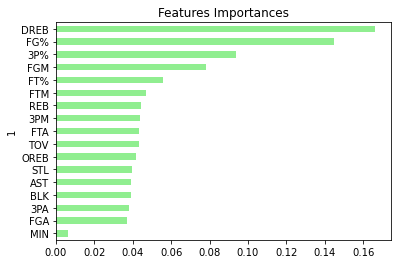

In [142]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)